# Independent Research Project
## Lending Club 2007-2015 Data Exploration
### Author: Joseph DeVito
#### Objective:
The goal of this project is to explore the data of approved loans from 2007 to 2015, sourced from online lender Lending Club (www.lendingclub.com). The project has two parts, the first which aims at employing classification techniques to the problem of predicting whether or not a borrower will repay his or her loan on time, and the second being an experiment with grouping similar borrowers. This is my first independent research project, which I plan to use as a hands on data science learning experience to develop my EDA and machine learning skills.


## Imports

In [46]:
%matplotlib inline

# Import
import math, time, random
import datetime as dt

# Data Manipulation
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Data Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Pre-processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler

# Machine Learning
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier



import warnings
warnings.filterwarnings('ignore')


In [3]:
# Functions:

# Code credits to Masum Rumi on Kaggle:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# EDA
## Includes:
 - **Loading the data**
    - Understanding the shape/size and description of the data.
 - **Data Analysis and Cleaning:**
    - Missing values
    - Target Creation
    - Data Visualization
    - Feature Investigation & Engineering
       - Encoding
       - Standardizing

In [4]:
# Loading the dataset:
data = pd.read_csv('~/Desktop/datasets/lending-club-loan-data/loan.csv', low_memory=False)

# Getting some information about the size/shape/types of the dataset:
print('Number of features: {}'.format(data.shape[1]))
print('Number of examples: {}'.format(data.shape[0]))

Number of features: 145
Number of examples: 2260668


### Missing Values:
Lets see how many columns we can exclude due to lack of information. The following function missing_percentage is a useful function that I found in one of Masum Rumi's notebooks, which easily displays the number of missing values and the number of missing values as a percentage of total values for each given feature in the dataset.

In [5]:
missing_percentage(data)

,Total,Percent
acc_now_delinq,29,NaN
acc_open_past_24mths,50030,2.21
all_util,866348,38.32
annual_inc,4,NaN
annual_inc_joint,2139958,94.66
avg_cur_bal,70346,3.11
bc_open_to_buy,74935,3.31
bc_util,76071,3.36
chargeoff_within_12_mths,145,0.01
collections_12_mths_ex_med,145,0.01


In [6]:
# Lets drop all the features with 100% missing values:
data.dropna(axis=1, how='all', inplace=True)

In [7]:
# Lets drop all the features with >25% missing values:
#data.drop(['id','settlement_status','settlement_percentage','debt_settlement_flag_date','settlement_term',
           #'settlement_date','settlement_amount','next_pymnt_d','mths_since_last_record'], axis=1, inplace=True)
data_cl = data.copy()
data_cl.drop(['annual_inc_joint','debt_settlement_flag_date','deferral_term','desc','dti_joint','hardship_amount',
          'hardship_dpd','hardship_end_date','hardship_last_payment_amount','hardship_length','hardship_loan_status',
          'hardship_payoff_balance_amount','hardship_reason','hardship_start_date','hardship_status','hardship_type','sec_app_chargeoff_within_12_mths',
          'sec_app_collections_12_mths_ex_med','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc',
          'sec_app_mths_since_last_major_derog','sec_app_num_rev_accts','sec_app_open_acc','sec_app_open_act_il',
          'sec_app_revol_util','settlement_amount','settlement_date','settlement_percentage','settlement_status','settlement_term',
          'verification_status_joint','orig_projected_additional_accrued_interest','payment_plan_start_date','revol_bal_joint',
          'mths_since_last_record','mths_since_last_delinq','mths_since_last_major_derog','mths_since_last_record',
          'next_pymnt_d','all_util','il_util','inq_fi','inq_last_12m','max_bal_bc','mths_since_rcnt_il',
          'mths_since_recent_bc_dlq','mths_since_recent_revol_delinq','mths_since_recent_inq','open_acc_6m',
          'open_act_il','open_il_12m','open_il_24m','open_rv_12m','open_rv_24m','total_bal_il','total_cu_tl'], axis=1, inplace=True)




In [8]:
missing_percentage(data_cl)

,Total,Percent
acc_now_delinq,29,NaN
acc_open_past_24mths,50030,2.21
annual_inc,4,NaN
avg_cur_bal,70346,3.11
bc_open_to_buy,74935,3.31
bc_util,76071,3.36
chargeoff_within_12_mths,145,0.01
collections_12_mths_ex_med,145,0.01
delinq_2yrs,29,NaN
delinq_amnt,29,NaN


Now that we have a cleaner dataset, we can look through each of the features and see how they may be of use to our classification problem.

### Target Feature: loan_status
This feature describes the current status of the loan, and will be the primary way that we can classify the loans. We will exclude all classifications other than Fully Paid and Charged off, in order to have a binary classification problem. We will use LabelEncoder to classify Fully Paid as 1 and Charged off as 0.

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

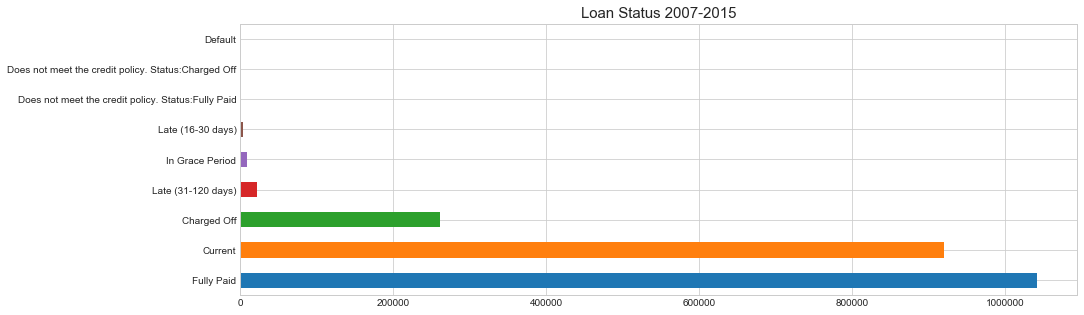

In [9]:
data_cl['loan_status'].value_counts().plot('barh', figsize=(15,5))
plt.title('Loan Status 2007-2015', size=15)
data_cl['loan_status'].value_counts()

In [10]:
data_cl = data_cl[(data_cl['loan_status'] == 'Fully Paid') | (data_cl['loan_status'] == 'Charged Off')]
lab_enc = LabelEncoder()
data_cl.iloc[:,14] = lab_enc.fit_transform(data_cl.iloc[:,14])

### Data Visualization:
Lets create some graphs to get a better sense of how our data is distributed and correlated.

Text(0.5,0,'Number of loans')

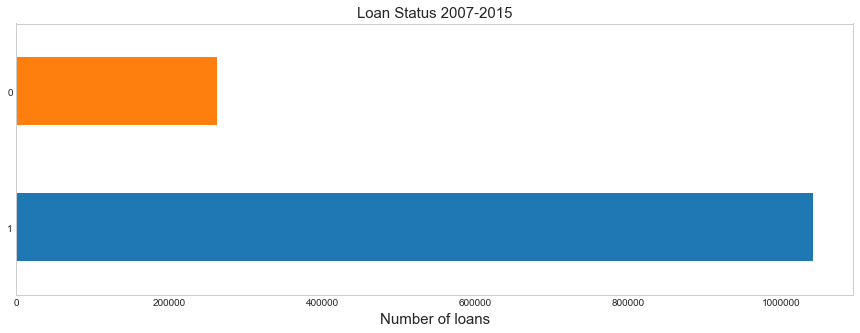

In [11]:
data_cl['loan_status'].value_counts().plot('barh', figsize=(15,5))
plt.grid(b=None)
plt.title('Loan Status 2007-2015', size=15)
plt.xlabel('Number of loans', fontsize=15)

From this chart we can see that there are clearly a lot more fully paid loans, than charged off loans. This information is good to know as it informs us of a class imbalance issue that we must deal with before creating the model. 


Text(0.5,0,'Purpose of loan')

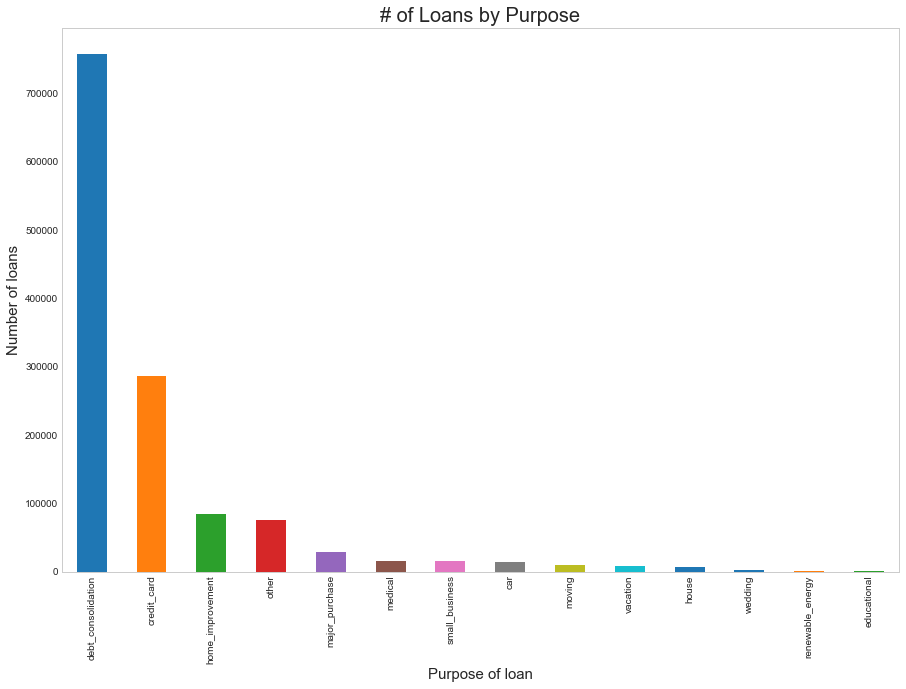

In [12]:
data_cl['purpose'].value_counts().plot('bar', figsize=(15,10))
plt.grid(b=None)
plt.title('# of Loans by Purpose', size=20)
plt.ylabel('Number of loans', size=15)
plt.xlabel('Purpose of loan', size=15)

This chart gives us some context about the loans and why people are going to LC for a loan. The clear majority of loans are being used for debt consolidation and to repay credit cards. This is good to know and may help explain some of the reasons why people may not be able to pay back their loans (too much debt, cannot afford the loan even if it was an attempt to pay down or consolidate existing debt.).

Text(0.5,1,'Interest Rate distribution')

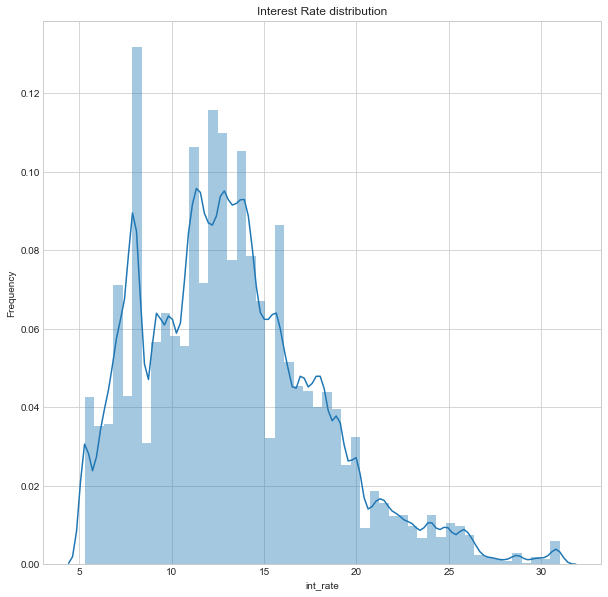

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(data_cl.int_rate)
plt.ylabel('Frequency')
plt.title('Interest Rate distribution')

We can see from the rate distribution, that all rates are within a range of roughly 5% to 32%, with the majority falling between 10% and 15%. These rates are pretty high, and can help explain why some borrowers might fail to pay back thier loan. 

Text(0.5,1,'Interest Rate Boxplot by Grade')

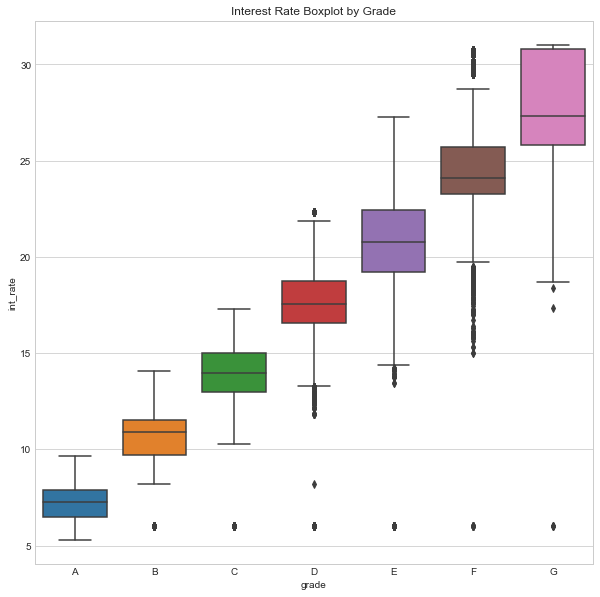

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_cl['grade'],y=data_cl['int_rate'], order=['A','B','C','D','E','F','G'])
plt.title('Interest Rate Boxplot by Grade')

Looking at the box plot above, we can see that there are some outliers that exist for each grade, and there is a clear linear relationship between interest rate and grade. 

Text(0.5,0,'Employment Length')

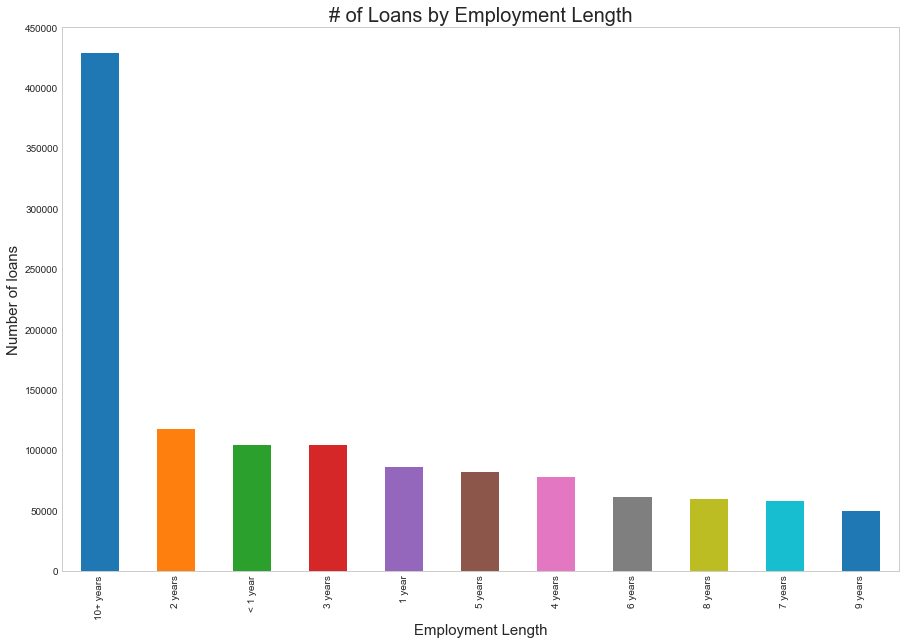

In [15]:
data_cl['emp_length'].value_counts().plot('bar', figsize=(15,10))
plt.grid(b=None)
plt.title('# of Loans by Employment Length', size=20)
plt.ylabel('Number of loans', size=15)
plt.xlabel('Employment Length', size=15)


We can see that the largest amount of loans corresponding to employment length is for those who work 10 years or more. The next few categories are 2,3, and < 1 year, which may be correlated to the loans which defaulted. <br>

## Feature Investigation & Enigineering:
Now lets look at the features and go through each of them to see which may be most useful, which are redundant (correlated), and which need to be encoded (categorical).

#### Analyzing the features:
The dataset has an accompanying excel file that provides descriptions for each of the given features. To simplify the classification problem, lets assess each of the given features and just do a quick thought exercise for each feature and its potential usefulness (20-30mins).
 - loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. **This feature seems like it will be one of the more important features to consider.**
 - funded_amnt: The total amount committed to that loan at that point in time. **This feature looks to be a repeat of loan_amnt, perhaps we can remove it.**
 - funded_amnt_inv: The total amount committed by investors for that loan at that point in time. **This feature again should match up with loan_amnt and reflect similar information.**
 - term: The number of payments on the loan. Values are in months and can be either 36 or 60. **Most likely useful.**
 - int_rate: Interest Rate on the loan. **Most likely useful, but may also be reflected in the grade.**
 - installment: The monthly payment owed by the borrower if the loan originates. **Most likely useful.**
 - grade: LC assigned loan grade. **Correlated with rate.**
 - sub_grade: LC assigned loan subgrade. **May also repeat info like grade/rate.**
 - emp_title: The job title supplied by the Borrower when applying for the loan. **May be interesting to explore, potenially useful.**
 - emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. **Potentially useful, although annual income is probably a better indicator.**
 - home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER **Probably useful.**
 - annual_inc: The self-reported annual income provided by the borrower during registration. **Definitely useful.**
 - verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified. **Probably useful as it helps determine credibility of the borrower.**
 - issue_d: The month which the loan was funded. **Not immediately apparent how this can be of help.**
 - pymnt_plan: Indicates if a payment plan has been put in place for the loan. **This can be helpful.**
 - purpose: A category provided by the borrower for the loan request. **Important to know for classification.**
 - title: The loan title provided by the borrower. **Again may be useful.**
 - zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application. **Not full zip code, so it will not help us much.**
 - addr_state: The state provided by the borrower in the loan application. **Definitely useful.**
 - dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. **Definitely useful.**
 - delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. **Useful.**
 - earlist_cr_line: The month the borrower's earliest reported credit line was opened. **Maybe useful.**
 - inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) **Maybe useful.**
 - open_acc: The number of open credit lines in the borrower's credit file. **Useful.**
 - pub_rec: Number of derogatory public records. **Useful.**
 - revol_bal: Total credit revolving balance. **Unsure if it will be useful but lets see.**
 - revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. **Unsure if it will be useful but lets see.**
 - total_acc: The total number of credit lines currently in the borrower's credit file. **Maybe useful.**
 - initial_list_status: The initial listing status of the loan. Possible values are – W, F. **Unsure if useful.**
 - out_prncp: Remaining outstanding principal for total amount funded. **Not useful, provides future information.**
 - out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors. **Not useful, provides future information.**
 - total_pymnt: Payments received to date for total amount funded. **Not useful, future info.**
 - total_pymnt_inv: Payments received to date for portion of total amount funded by investors. **Not useful, future info.**
 - total_rec_prncp: Principal received to date. **Not useful, future info.**
 - total_rec_int: Interest received to date. **Not useful, future info.**
 - total_rec_late_fee: Late fees received to date. **Not useful, future info.**
 - recoveries: post charge off gross recovery. **Not useful, future info.**
 - collection_recovery_fee: post charge off collection fee. **Not useful, future info.**
 - last_pymnt_d: Last month payment was received. **Not useful, future info.**
 - last_pymnt_amnt: Last total payment amount received. **Not useful, future info.**
 - last_credit_pull_d: The most recent month LC pulled credit for this loan. **Unsure**
 - collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections **Unsure.**
 - policy_code:publicly available policy_code=1, new products not publicly available policy_code=2 **Unsure.**
 - application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers. **Useful.**
 - acc_now_delinq: The number of accounts on which the borrower is now delinquent. **Useful.**
 - tot_coll_amt: Total collection amounts ever owed. **Not useful, possible future info.**
 - tot_cur_bal: Total current balance of all accounts. **Not useful, future info.**
 - total_rev_hi_lim: Total revolving high credit/credit limit. **Unsure, possibly not useful.**
 - acc_open_past_24mths: Number of trades opened in past 24 months. **Unsure, possibly not useful.**
 - avg_cur_bal: Average current balance of all accounts . **Unsure, possibly not useful.**
 - bc_open_to_buy: Total open to buy on revolving bankcards. **Unsure**
 - bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts. **Unsure**
 - chargeoff_within_12_mths: Number of charge-offs within 12 months **Possibly useful**
 - delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent. **Possibly Useful**
 - mo_sin_old_il_acct: Months since oldest bank installment account opened **Unsure.**
 - mo_sin_old_rev_tl_op: Months since oldest revolving account opened **Unsure**
 - mo_sin_rcnt_rev_tl_op: Months since most recent revolving account opened **Unsure**
 - mo_sin_rcnt_tl: Months since most recent account opened **Unsure**
 - mort_acc: Number of mortgage accounts. **Useful**
 - mths_since_recent_bc: Months since most recent bankcard account opened. **Unsure**
 - num_accts_ever_120_pd: Number of accounts ever 120 or more days past due **Possibly useful**
 - num_actv_bc_tl: Number of currently active bankcard accounts. **Possible future info**
 - num_actv_rev_tl: Number of currently active revolving trades **Possible future info**
 - num_bc_sats: Number of satisfactory bankcard accounts **Useful**
 - num_bc_tl: Number of bankcard accounts **Useful**
 - num_il_tl: Number of installment accounts **Useful**
 - num_op_rev_tl: Number of open revolving accounts **Useful**
 - num_rev_accts: Number of revolving accounts **Useful**
 - num_rev_tl_bal_gt_0: Number of revolving trades with balance >0 **Useful**
 - num_sats: Number of satisfactory accounts **Useful**
 - num_tl_120dpd_2m: Number of accounts currently 120 days past due (updated in past 2 months) **Future info**
 - num_tl_30dpd: Number of accounts currently 30 days past due (updated in past 2 months) **Future info**
 - num_tl_90g_dpd_24m: Number of accounts 90 or more days past due in last 24 months **Possibly useful**
 - num_tl_op_past_12m: Number of accounts opened in past 12 months **Possibly useful**
 - pct_tl_nvr_dlq: Percent of trades never delinquent **Possibly useful**
 - percent_bc_gt_75: Percentage of all bankcard accounts > 75% of limit. **Possibly useful**
 - pub_rec_bankruptcies: Number of public record bankruptcies **Useful**
 - tax_liens: Number of tax liens **Useful**
 - tot_hi_cred_lim: Total high credit/credit limit **Possibly useful**
 - total_bal_ex_mort: Total credit balance excluding mortgage **Possibly useful**
 - total_bc_limit: Total bankcard high credit/credit limit **Possibly useful**
 - total_il_high_credit_limit: Total installment high credit/credit limit **Possibly useful**
 - hardship_flag: Flags whether or not the borrower is on a hardship plan **Useful**
 - disbursement_method: The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY **Does not seem to be that helpful**
 - debt_settlement_flag: Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company. **Not useful, future info**
 
 
Now lets drop the columns that appear to have future info and that may not be helpful with our analysis, as we can always go back and add them later, however, lets keep in mind that simplification of our model is ideal.

In [16]:
# Features that give future information:
drop_cols = ['funded_amnt', 'funded_amnt_inv','emp_title', 'zip_code','out_prncp', 'out_prncp_inv', 
             'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
             'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','tot_coll_amt','tot_cur_bal',
            'debt_settlement_flag','num_tl_120dpd_2m','num_tl_30dpd','num_actv_bc_tl','num_actv_rev_tl',
             'disbursement_method','mo_sin_old_il_acct']
data_cl.drop(drop_cols, axis=1, inplace=True)

Now lets also look through the columns and keep only those that Lending Club says investors have access to at the time of initial loan investment. 

In [17]:
# Features that are not available to investors:
drop_cols_a = ['pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'last_credit_pull_d', 'collections_12_mths_ex_med', 
               'policy_code', 'acc_now_delinq', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 
               'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op', 
               'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 
               'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
               'num_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 
               'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
               'hardship_flag']
data_cl.drop(drop_cols_a, axis=1, inplace=True)

## Feature Engineering:
Lets analyze each of the categorical features and see how we can encode them:
 - **term:** either 36 or 60 months (No ordering.)
 - **grade:** A-G, (Natural ordering.)
 - **sub_grade:** 35 different classes (Natural ordering.)
 - **emp_length:** <1 yr - 10+ yrs (Natural ordering, salary should increase with more years of experience.)
 - **home_ownership:** OWN, RENT, MORTGAGE, ANY, NONE, OTHER (No ordering.)
 - **verification_status:** Source Verified, Verified, Not Verified (No ordering.)
 - **addr_state:** 51 options (No ordering.)
 - **purpose:** 14 different options (No ordering.)
 - **title:** Too many values, we will just remove this.
 - **addr_state:** 51 States, will add too many features, we will remove this as well.
 - **earliest_cr_line:** Date, we will convert this into integers.
 - **initial_list_status:** Fractional or Whole (Natural ordering.)
 - **application_type:** Joint App or Individual (Natural ordering, joint applications often qualify more.)
 


Lets first convert earliest_cr_line and last_credit_pull_d to integers, and remove the title feature. And then use LabelEncoder for the natural ordering variables. Finally we will use get_dummies for the variables in which ordering does not matter.

In [18]:
data_cl['issue_d'] = pd.to_datetime(data_cl['issue_d']) 
data_cl['issue_d'] = data_cl['issue_d'].map(dt.datetime.toordinal)

data_cl['earliest_cr_line'] = pd.to_datetime(data_cl['earliest_cr_line']) 
data_cl['earliest_cr_line'] = data_cl['earliest_cr_line'].map(dt.datetime.toordinal)

In [19]:
data_cl.drop(['title'], axis=1, inplace=True)

In [20]:
emp_map = {
    'emp_length': {
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'n/a': 0
    }
}

data_cl.replace(emp_map, inplace=True)

In [21]:
le_feat = ['grade', 'sub_grade', 'initial_list_status', 
                     'application_type']

for i in le_feat:
    le = LabelEncoder()
    data_cl[i] = le.fit_transform(data_cl[i])
    

In [22]:
dummy_feat = ['term', 'home_ownership', 'verification_status', 'purpose', 'addr_state']

for i in dummy_feat:
    temp = pd.get_dummies(data_cl[i])
    data_cl = pd.concat([data_cl, temp], axis=1)
    data_cl.drop(i, axis=1, inplace=True)    

In [23]:
missing_percentage(data_cl)

,Total,Percent
emp_length,75454,5.79
mort_acc,47281,3.63
revol_util,810,0.06
pub_rec_bankruptcies,697,0.05
dti,312,0.02


In [24]:
missing_vals = ['emp_length','mort_acc','revol_util','pub_rec_bankruptcies','dti']

for i in missing_vals:
    data_cl[i].fillna(value=data_cl[i].mean(), inplace=True)

In [25]:
# Lets just check visually that we encoded everything:
data_cl.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
100,30000,22.35,1151.16,3,19,5.0,100000.0,737029,1,30.46,...,0,0,0,0,0,0,0,0,0,0
152,40000,16.14,975.71,2,13,0.0,45000.0,737029,1,50.53,...,0,0,0,0,0,0,0,0,0,0
170,20000,7.56,622.68,0,2,10.0,100000.0,737029,1,18.92,...,0,0,0,0,0,0,1,0,0,0
186,4500,11.31,147.99,1,7,10.0,38500.0,737029,1,4.64,...,0,0,1,0,0,0,0,0,0,0
215,8425,27.27,345.18,4,24,3.0,450000.0,737029,1,12.37,...,0,0,0,0,0,0,0,0,0,0


### Standardizing
Now lets standardize the data before we run our models.

In [26]:
X = data_cl.iloc[:, data_cl.columns != 'loan_status']
y = data_cl['loan_status']
r_scale = RobustScaler()
X = r_scale.fit_transform(X)

# Modeling & Feature Selection:
## Includes:
 - **Train/Test Split**
 - **UnderSampling for Class Imbalance**
 - **Model Creation & Fitting**
    - Logistic Regression
    - Naive Bayes
    - Random Forest
    - AdaBoost
 - **Hyperparameter Tuning**
 - **Ensembling**
 
 
**Class Imbalance Issue:** As we saw earlier in the graph comparing fully paid vs charged off loans, we have a significantly higher amount of fully paid loans as opposed to charged off loans, creating a class imbalance. In order to deal with this, we will apply random undersampling to our dataset.

Lets first split the data into X, and y. Then lets run our models using 10 folds for cross validation. <br>
Before we run our models, lets try to understand our problem and why we are classifying the borrower loans as either fully paid or charged off. Lets say we are investors in lending club, we would want to maximize our investment in the amount of loans that are fully paid off, while minimizing our investment in those loans that are likely to be charged off. In order to use our models to better understand which types of loans we should invest in, we need to focus on the investor's risk/reward profile. <br> 
For more risk averse investors, we would choose to focus primarily on the **False Positives and True Negatives** of our classifiers. **False Positives** signify loans that based on our model, we would invest in, but in reality they would be charged off and we would lose money. **True Negative** are loans that our model correctly identified as charged off, or not investment worthy loans. <br>
For more risk seeking investors, we would choose to focus primarily on the **False Negatives and True Positives** of our classifiers. **False Negatives** will predict that the loan is charged off when in reality it was fully paid off, so this would be a loan that based on our model, we would not invest in, but in reality we would miss out on the opportunity to earn a return, since these loans actually do end up being paid back. **True Positives** are loans that our model correctly identified as fully paid off and are loans that we would earn a return on. <br>

While all four metrics are important to focus on, in my opinion both types of investors should focus on using a model that minimizes False Positives and True Positives. So to examine each of our classifier's performance, we will focus on the False Positive Rate and the Precision Rate, which can be explained nicely by the AUC-ROC.



In [27]:
# Train Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# Random Undersampling:
rand_us = RandomUnderSampler()
X_samp, y_samp = rand_us.fit_sample(X_train, y_train)


In [29]:
# Logistic Model:
log_m = LogisticRegression()
log_m.fit(X_samp, y_samp)
log_m_scores = cross_val_score(log_m, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Pre-tuning Logistic Regression model average AUC:', log_m_scores.mean())


Pre-tuning Logistic Regression model average AUC: 0.7107355521623488


In [30]:
# Naive Bayes Model:
nb_m = GaussianNB()
nb_m.fit(X_samp, y_samp)
nb_m_scores = cross_val_score(nb_m, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Naive Bayes model average AUC:', nb_m_scores.mean())

Naive Bayes model average AUC: 0.6509128708930801


In [31]:
# Random Forest Model:
rf_m = RandomForestClassifier()
rf_m.fit(X_samp, y_samp)
rf_m_scores = cross_val_score(rf_m, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Pre-tuning Random Forest model average AUC:', rf_m_scores.mean())


Pre-tuning Random Forest model average AUC: 0.6520270525998564


In [32]:
# AdaBoost Model:
ada = AdaBoostClassifier()
ada.fit(X_samp,y_samp)
ada_scores = cross_val_score(ada, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Pre-tuning AdaBoostClassifier model average AUC:', ada_scores.mean())

AdaBoostClassifier model average AUC: 0.7151060159512115


By comparing the AUR-ROC scores for each of the pre-tuning models, we can see that s performs best.

#### Hyperparameter tuning using gridsearch:

In [33]:
# Logistic Regression parameter tuning
params = [{'C' : [0.001,0.01,0.1,1,10]}]
grid_search_log = GridSearchCV(log_m, params,scoring='roc_auc',cv=3, n_jobs=-1)
grid_search_log.fit(X_samp,y_samp)
grid_search_log.best_params_

{'C': 0.1}

In [34]:
# Logistic Model:
log_m = LogisticRegression(C=0.1)
log_m.fit(X_samp, y_samp)
log_m_scores = cross_val_score(log_m, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Post-tuning Logistic Regression model average AUC:', log_m_scores.mean())


Post-tuning Logistic Regression model average AUC: 0.7108666242885439


Not much improvement after tuning the logistic regression model. Lets now look at Random forest.

In [36]:
# Random Forest parameter tuning
#params_rf = [{'n_estimators' : [10,30,50,100,200]}]
#grid_search_rf = GridSearchCV(rf_m, params_rf,scoring='roc_auc',cv=3, n_jobs=-1)
#grid_search_rf.fit(X_samp,y_samp)
#grid_search_rf.best_params_

In [40]:
# Random Forest Model:
rf_m = RandomForestClassifier(n_estimators = 200 )
rf_m.fit(X_samp, y_samp)
rf_m_scores = cross_val_score(rf_m, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Post-tuning Random Forest model average AUC:', rf_m_scores.mean())


Post-tuning Random Forest model average AUC: 0.7113199664332998


After parameter tuning, the Random Forest model has much better performance!

In [ ]:
# AdaBoost parameter tuning
#params_ad = [{'n_estimators' : [50,100,200]}]
#grid_search_ad = GridSearchCV(ada, params_ad,scoring='roc_auc',cv=3, n_jobs=-1)
#grid_search_ad.fit(X_samp,y_samp)
#grid_search_ad.best_params_

In [44]:
# AdaBoost Model:
ada = AdaBoostClassifier(n_estimators = 200)
ada.fit(X_samp,y_samp)
ada_scores = cross_val_score(ada, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Post-tuning AdaBoostClassifier model average AUC:', ada_scores.mean())

Post-tuning AdaBoostClassifier model average AUC: 0.7197814218348069


**Ensemble: Soft voting classifier**
Now lets ensemble the four tuned parameter models, using the Soft Voting Classifier ensembling method, and see if we can improve our AUC-ROC score.

In [48]:
voting_en = VotingClassifier(estimators = ([('Logistic Regression',log_m),('Naive Bayes', nb_m),
                                           ('Random Forest',rf_m),('AdaBoost',ada)]), voting='soft')
vot_scores = cross_val_score(voting_en, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Voting Ensemble model average AUC:', vot_scores.mean())


Voting Ensemble model average AUC: 0.6956892987555413


In [50]:
voting_en_s = VotingClassifier(estimators = ([('Logistic Regression',log_m),
                                           ('Random Forest',rf_m),('AdaBoost',ada)]), voting='soft')
vot_scores_s = cross_val_score(voting_en_s, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Voting Ensemble excluding NB model average AUC:', vot_scores_s.mean())


Voting Ensemble excluding NB model average AUC: 0.7170956324138987


In [51]:
voting_en_3 = VotingClassifier(estimators = ([('Random Forest',rf_m),('AdaBoost',ada)]), voting='soft')
vot_scores_3 = cross_val_score(voting_en_3, X_test, y_test, scoring='roc_auc', cv=3, n_jobs=-1)
print('Voting Ensemble excluding NB & LR model average AUC:', vot_scores_3.mean())


Voting Ensemble excluding NB & LR model average AUC: 0.7119962535896206


## Conclusion:
In conclusion of this project, the model with the best AUC-ROC score was the AdaBoost model. With a score of 0.71978, this model is fairly accurate, however it can be improved. All of the models have an AUC-ROC score around 0.71, which suggests that the performance is limited by the dataset and features. This project was a great learning experience for me, and has inspired me to conduct future research. 